## 获取logs文件夹下面啊所有的日志文件  用于数据集提取

In [4]:
import os  
import re
def get_all_rcg_and_rcl(rcg,rcl):
    cureent_dir=os.path.abspath(os.curdir)            
    for root,dir,files in os.walk(cureent_dir):              
        for file in files: 
            #分离名字
            get_name = os.path.join(file).replace("_", " ").replace("-"," ").split()
            
            if os.path.splitext(file)[1] == '.rcg':  # 想要保存的文件格式 
                rcg.append(os.path.join(file))       #数组三个为一个整体
                rcg.append(get_name[1])
                rcg.append(get_name[4]) 
            if os.path.splitext(file)[1]==".rcl":
                rcl.append(os.path.join(file))
                rcl.append(get_name[1])
                rcl.append(get_name[4])
   #print(rcg,rcl)
    return rcg,rcl

rcg=[]
rcl=[]
get_all_rcg_and_rcl(rcg,rcl)

print(rcg,rcl)

['20190707104449-YuShan2019_1-vs-CYRUS2019_3.rcg', 'YuShan2019', 'CYRUS2019', '20190707101508-MT2019_1-vs-YuShan2019_3.rcg', 'MT2019', 'YuShan2019', '20190707124404-Fractals2019_1-vs-HELIOS2019_0.rcg', 'Fractals2019', 'HELIOS2019', '20190707110008-CYRUS2019_0-vs-Fractals2019_2.rcg', 'CYRUS2019', 'Fractals2019'] ['20190707124404-Fractals2019_1-vs-HELIOS2019_0.rcl', 'Fractals2019', 'HELIOS2019', '20190707104449-YuShan2019_1-vs-CYRUS2019_3.rcl', 'YuShan2019', 'CYRUS2019', '20190707110008-CYRUS2019_0-vs-Fractals2019_2.rcl', 'CYRUS2019', 'Fractals2019', '20190707101508-MT2019_1-vs-YuShan2019_3.rcl', 'MT2019', 'YuShan2019']


## rcg提取

In [5]:
def seg_2_csv(test_rcg_seg, l_name, r_name,player_dict):
    import re
    cycle_exp = "show (\d+) "
    cycle_time = re.search(cycle_exp, test_rcg_seg)
    time = cycle_time.group(1)
    time
    # In[29]:

    ball_state_exp = "b\) (.*?)\)"
    ball_state = re.search(ball_state_exp, test_rcg_seg)
    ball_state = ball_state.group(1).split(" ")

    ball_x, ball_y, ball_vel_x, ball_vel_y = ball_state[0], ball_state[1], ball_state[2], ball_state[3]

    # In[38]:

    segle_player_exp = "\(\(((l|r).*?)\)\)"
    all_side = re.findall(segle_player_exp, test_rcg_seg)
    all_side[0]

 
    for (count, i) in enumerate(all_side):
        side = i[1]
        player_info_exp = "(l|r)(.*?)\("
        player_info = re.search(player_info_exp, i[0]).group(0)
        player_info = player_info.replace(")", "").split()

        name_pre = None
        if side == "l":
            name_pre = l_name
        else:
            name_pre = r_name
        
        
        Name = name_pre + "_" + player_info[1]  #用于下面插入产球的数据位置判断
        
        #init
        if len(player_dict)<1:
            player_dict["time"] = [time]
            
            player_dict["player_side"] = [player_info[0]]
            player_dict["team_name"] = [name_pre]
            
            player_dict["ball_x"] = [ball_x]
            player_dict["ball_y"] = [ball_y]
            
            player_dict["player_num"] = [Name]
            player_dict["player_x"] = [player_info[4]]
            player_dict["player_y"] = [player_info[5]]
            player_dict["player_body"] = [player_info[8]]
            player_dict["player_neck"] = [player_info[9]]

            
            # print(player_dict)
        else:
            player_dict["time"].append(time)
            
            player_dict["player_side"].append(player_info[0])
            player_dict["team_name"].append(name_pre)
            
            player_dict["ball_x"].append(ball_x)
            player_dict["ball_y"].append(ball_y)
           
            player_dict["player_num"].append(Name)
            player_dict["player_x"].append(player_info[4])
            player_dict["player_y"].append(player_info[5])
            player_dict["player_body"].append(player_info[8])
            player_dict["player_neck"].append(player_info[9])
       
    
if __name__ == "__main__":
    #rcg=[]
    #rcl=[]
    #get_all_rcg_and_rcl(rcg,rcl)
    #print(rcg,rcl)
    
    
    
    l_rcg = len(rcg)
   # print(l_rcg)
    
    rcg_dir=[]
    for k in range(0,l_rcg,3):
        l_name=rcg[k+1]
        r_name=rcg[k+2]
    
        rcg_r=open(rcg[k],"r")
        player_dict={}
        for (count,i) in enumerate(rcg_r):
            if "show" in i:
                #print(count)
                seg_2_csv(i,l_name,r_name,player_dict)
            

        import pandas as pd
        df=pd.DataFrame(player_dict)
        
        pt=l_name+"_vs_"+r_name+"-rcg"+".csv"
        rcg_dir.append(pt)
        
        df.to_csv(pt,index=False)
        print("ok ",rcg[k],"\n")
        
        rcg_r.close()
    print("----------over--------")
    
    

ok  20190707104449-YuShan2019_1-vs-CYRUS2019_3.rcg 

ok  20190707101508-MT2019_1-vs-YuShan2019_3.rcg 

ok  20190707124404-Fractals2019_1-vs-HELIOS2019_0.rcg 

ok  20190707110008-CYRUS2019_0-vs-Fractals2019_2.rcg 

----------over--------


In [ ]:
import pandas  as pd

rcg_data=pd.read_csv()

## rcl提取

In [6]:
def seg_2_csv(test_rcl_seg, player_dict):
    import re
    #print test_rcl_seg
    cycle_exp = "(\d*)"
    cycle_time = re.search(cycle_exp, test_rcl_seg)
    time = cycle_time.group(1)
    time

    segle_player_exp = "Recv.*"
    all_side=re.findall(segle_player_exp,test_rcl_seg)
    all_side[0]

    for (count, i) in enumerate(all_side):
        player_info_exp = "Recv(.*?)"
        player_info = re.search(player_info_exp, i).group(0)
        player_info = i.replace("_", " ")
        player_info = player_info.replace("(","")
        player_info = player_info.replace(")"," ")
        player_in = player_info.replace(":","").split()

        tackle_da = "attentionto our (\d*)"
        tackle_angle=re.search(tackle_da, i)
        if tackle_angle:
            attention=re.search(tackle_da, i).group(0).split()[2]
        else:attention=None
    
        tackle_dir = player_in[4]#[0:-1] 
        
        '''
      
        if "attentionto" in i:
            attention = player_in[10]
        else:attention= None     #-1表示没有
        ''' 
       
        if len(player_dict)<1:
            player_dict["time"] = [time]
            player_dict["team_name"] = [player_in[1]]
            player_dict["player_num"] = [player_in[1]+ "_" + player_in[2]]
            
            player_dict["tackle_dir"] = [tackle_dir]    
            
            player_dict["attentionto"]=[attention]
            
        else:
            player_dict["time"].append(time)
            player_dict["team_name"].append(player_in[1])
            player_dict["player_num"].append(player_in[1] + "_" + player_in[2])

            # parse tackle
            player_dict["tackle_dir"].append(tackle_dir)
            
            player_dict["attentionto"].append(attention)




if __name__ == "__main__":

    l_rcl=len(rcl)
    rcl_dir=[]
    for k in range(0,l_rcl,3):
        l_name=rcl[k+1]
        r_name=rcl[k+2]
    
        rcl_r=open(rcl[k],"r")
        
        player_dict={}
        
        for (count,i) in enumerate(rcl_r):
            if "tackle" in i:             #提取tackle值
                seg_2_csv(i,player_dict)

        import  pandas as pd
        df=pd.DataFrame(player_dict)
        
        pt=l_name+"_vs_"+r_name+"-rcl"+".csv"
        rcl_dir.append(pt)
        
        df.to_csv(pt,index=False)
        rcl_r.close()
        print("ok----"+rcl[k])
    print("-------over--------")

ok----20190707124404-Fractals2019_1-vs-HELIOS2019_0.rcl
ok----20190707104449-YuShan2019_1-vs-CYRUS2019_3.rcl
ok----20190707110008-CYRUS2019_0-vs-Fractals2019_2.rcl
ok----20190707101508-MT2019_1-vs-YuShan2019_3.rcl
-------over--------


In [8]:
import pandas  as pd
from time import *

rcg_name = rcg_dir[1]
rcg_data=pd.read_csv(rcg_name)

tackle_da=rcg_name[0:-7]+rcl_dir[0][-7:]

tackle_data=pd.read_csv(tackle_da)     #打开rcl提取文件

tackle_data.head(45)
rcg_data.head(10)

,time,player_side,team_name,ball_x,ball_y,player_num,player_x,player_y,player_body,player_neck
0,1,l,MT2019,0.0,0.0,MT2019_1,-49.0000,0.0000,2.755,80
1,1,l,MT2019,0.0,0.0,MT2019_2,-20.5030,-5.6995,30.781,-26
2,1,l,MT2019,0.0,0.0,MT2019_3,-21.0000,6.0000,-29.235,-90
3,1,l,MT2019,0.0,0.0,MT2019_4,-30.0000,-15.0000,30.203,-28
4,1,l,MT2019,0.0,0.0,MT2019_5,-30.0000,15.0000,-22.857,-90
5,1,l,MT2019,0.0,0.0,MT2019_6,-15.0000,0.0000,-13.291,-21
6,1,l,MT2019,0.0,0.0,MT2019_7,-9.0000,-6.0000,44.192,-41
7,1,l,MT2019,0.0,0.0,MT2019_8,-9.0000,6.0000,-44.471,41
8,1,l,MT2019,0.0,0.0,MT2019_9,-0.1253,-14.3758,97.981,89
9,1,l,MT2019,0.0,0.0,MT2019_10,-0.0010,15.0000,-103.273,90


## 合并

In [9]:
import pandas  as pd
from time import *

rcg_name = rcg_dir[1]
rcg_data=pd.read_csv(rcg_name)

#获取队伍名字
name_ = rcg_data.drop_duplicates(subset=['team_name'],keep='first')  
side = name_["player_side"][0]
if side == 'l':
    L_Name = name_["team_name"][0]
    R_Name = name_["team_name"][11]
else:
    L_Name = name_["team_name"][11]
    R_Name = name_["team_name"][0]

tackle_da=rcg_name[0:-7]+rcl_dir[0][-7:]  #获取与rcg文件对应的rcl文件名
tackle_data=pd.read_csv(tackle_da)     #打开rcl提取文件


df_merge = pd.merge(tackle_data,rcg_data,on=['time','player_num','team_name'],how='left')   #左连接   出现重复值

df_merge=df_merge.drop_duplicates(subset=['time','tackle_dir','player_num','attentionto'],keep='first')   #去重，保留第一个
#print(df_merge)
    
#左边球队的铲球值
l_tackle_name = "tackle_"+L_Name+".csv"
ds=df_merge[df_merge['team_name'] == L_Name]    #取出每个球队的值

ds.to_csv(l_tackle_name,index=False)

#右边球队的铲球值
r_tackle_name = "tackle_"+R_Name+".csv"
df_merge[df_merge['team_name'] ==R_Name].to_csv(r_tackle_name,index=False)

df_merge.head(50)

#df_merge.to_csv("tackle.csv",index=False)  
#print(df_merge.head(10))

,time,team_name,player_num,tackle_dir,attentionto,player_side,ball_x,ball_y,player_x,player_y,player_body,player_neck
0,39,YuShan2019,YuShan2019_10,-81,NaN,r,7.0966,-12.4255,6.0157,-13.4398,29.073,30
1,87,MT2019,MT2019_7,-81,9.0,l,-11.7031,-18.6272,-11.2494,-20.0272,150.381,-8
2,244,MT2019,MT2019_9,-27,6.0,l,9.5419,-26.0826,10.5710,-25.7384,-87.745,-29
33,274,MT2019,MT2019_9,0,6.0,l,14.0967,-28.4087,12.5456,-27.6783,-22.345,-1
34,364,MT2019,MT2019_6,63,NaN,l,6.7966,-12.6613,5.1709,-12.6179,9.465,-40
65,475,YuShan2019,YuShan2019_9,63,NaN,r,17.8565,32.0166,16.4893,32.1273,27.408,9
66,555,MT2019,MT2019_4,72,NaN,l,-28.0717,-24.9744,-26.3615,-24.5184,168.217,46
67,783,MT2019,MT2019_2,-9,3.0,l,-48.2106,-9.2426,-47.5800,-11.0216,92.990,-90
68,890,YuShan2019,YuShan2019_6,-99,10.0,r,17.7532,-26.9514,16.0076,-27.1362,-8.203,89
69,956,YuShan2019,YuShan2019_10,-9,NaN,r,15.4001,-9.2924,14.9300,-10.6498,100.353,-31


## 画球场

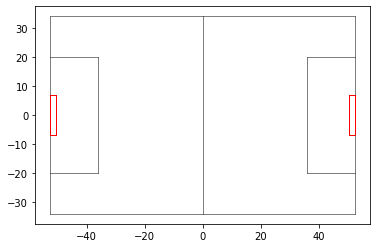

In [144]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn  as sns

def init():
        plt.plot([-52.5, -52.5], [-34, 34], color="k", linestyle="-", linewidth=0.5)
        plt.plot([52.5, 52.5], [-34, 34], color="k", linestyle="-", linewidth=0.5)
        plt.plot([52.5, -52.5], [-34, -34], color="k", linestyle="-", linewidth=0.5)
        plt.plot([52.5, -52.5], [34, 34], color="k", linestyle="-", linewidth=0.5)

        # opp penalty
        # Draws penalty area
        plt.plot([36, 52.5], [-20, -20], color="k", linestyle="-", linewidth=0.5)
        plt.plot([36, 52.5], [20, 20], color="k", linestyle="-", linewidth=0.5)
        plt.plot([36, 36], [-20, 20], color="k", linestyle="-", linewidth=0.5)
        plt.plot([52.5, 52.5], [7, -7], color='r', linewidth=1.0)
        plt.plot([50.5, 52.5], [7, 7], color='r', linewidth=1.0)
        plt.plot([50.5, 52.5], [-7, -7], color='r', linewidth=1.0)
        plt.plot([50.5, 50.5], [7, -7], color='r', linewidth=1.0)

        plt.plot([-36, -52.5], [-20, -20], color="k", linestyle="-", linewidth=0.5)
        plt.plot([-36, -52.5], [20, 20], color="k", linestyle="-", linewidth=0.5)
        plt.plot([-36, -36], [-20, 20], color="k", linestyle="-", linewidth=0.5)
        plt.plot([-52.5, -52.5], [7, -7], color='r', linewidth=1.0)
        plt.plot([-50.5, -52.5], [7, 7], color='r', linewidth=1.0)
        plt.plot([-50.5, -52.5], [-7, -7], color='r', linewidth=1.0)
        plt.plot([-50.5, -50.5], [7, -7], color='r', linewidth=1.0)
        
        plt.plot([0,0],[-34,34],color='k',linewidth=0.5)
        
        return plt
init().show()


In [103]:
import pandas  as pd
    
data_l=pd.read_csv(l_tackle_name)     #打开rcl提取文件

data_r = pd.read_csv(r_tackle_name)

print(len(data_l),len(data_r))

24 21


YuShan2019


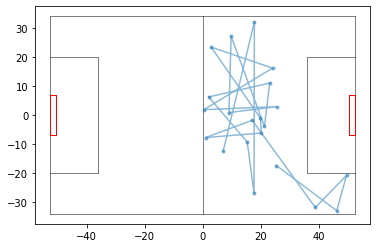

CYRUS2019


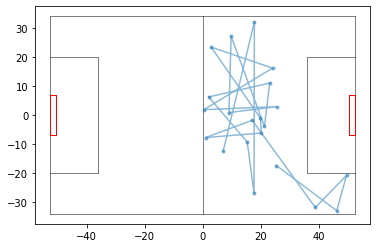

In [88]:
print(rcg[1])
ball_x=data_l['ball_x']
ball_y=data_l['ball_y']
plt=init()
plt.plot(ball_x,ball_y,marker='.',alpha=0.5)
plt.show()

print(rcg[2])
ball_x=data_r['ball_x']
ball_y=data_r['ball_y']
plt1=init()
plt1.plot(ball_x,ball_y,marker='.',alpha=0.5)
plt1.show()
#//////////////显示球场上所有球的点

Fractals2019


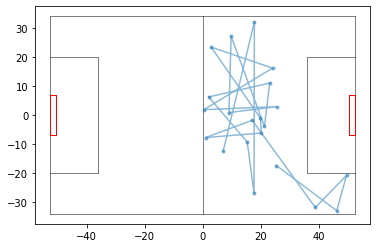

HELIOS2019


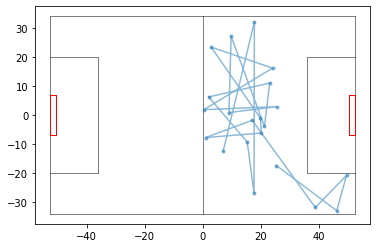

In [89]:
print(rcg[7])
ball_x=data_l['ball_x']
ball_y=data_l['ball_y']
plt=init()
plt.plot(ball_x,ball_y,marker='.',alpha=0.5)
plt.show()

print(rcg[8])
ball_x=data_r['ball_x']
ball_y=data_r['ball_y']
plt1=init()
plt1.plot(ball_x,ball_y,marker='.',alpha=0.5)
plt1.show()
#//////////////显示球场上所有球的点